# Signals and IoT Data Processing (LPF and MVA Filter)
## Nama: Gian Maxmillian Firdaus
## NIM:   1301190209

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, freqz

#### Baca Data Source
#### File: 13.csv

In [2]:
df = pd.read_csv("./datasets/15.csv", header = None)

#### Data Assigment

In [3]:
#Assign dataset ke masing-masing kolom/variabel A,B,C

A = df.iloc[:, 0] #index
B = df.iloc[:, 1] #sumbu X dari accelerometer
C = df.iloc[:, 2] #sumbu Y dari accelerometer
D = df.iloc[:, 3] #sumbu Z dari accelerometer

#sampel data 2000 record
B_2000 = B[0 : 2000]
C_2000 = C[0 : 2000]
D_2000 = D[0 : 2000]

## MVA FILTER

In [4]:
#Mengembalikan MVA dari dataset
def mva_filter(data,window_size):
  hasil = data.rolling(window=window_size).mean()
  return hasil

#### Kolom B (sumbu X dari accelerometer)

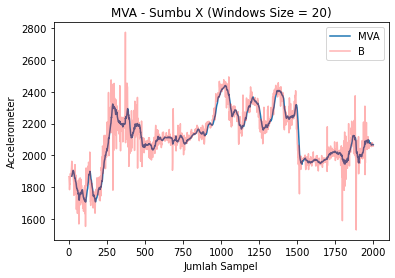

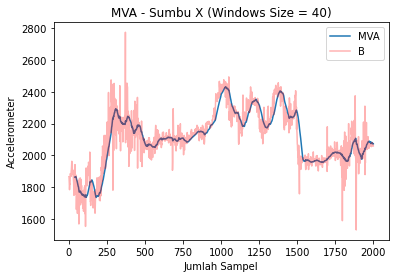

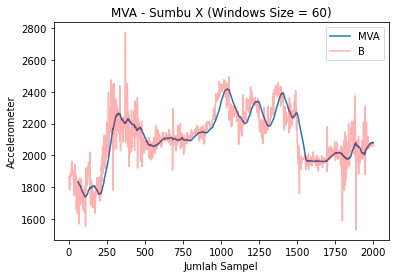

In [5]:
plot1 = plt.figure(1)
mva_filter(B_2000,20).plot(label ='MVA')
plt.plot(B_2000, label='B', alpha = 0.3, c='red')
plt.title('MVA - Sumbu X (Windows Size = 20)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

plot2 = plt.figure(2)
mva_filter(B_2000,40).plot(label ='MVA')
plt.plot(B_2000, label='B', alpha = 0.3, c='red')
plt.title('MVA - Sumbu X (Windows Size = 40)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

plot3 = plt.figure(3)
mva_filter(B_2000,60).plot(label ='MVA')
plt.plot(B_2000, label='B', alpha = 0.3, c='red')
plt.title('MVA - Sumbu X (Windows Size = 60)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

#### Kolom C (sumbu Y dari accelerometer)

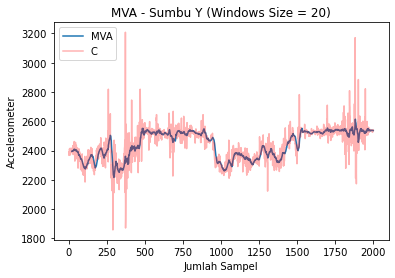

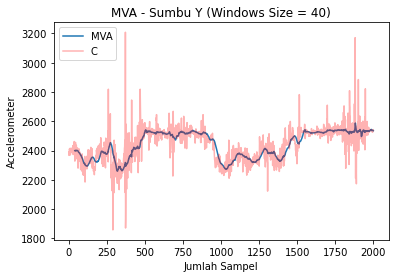

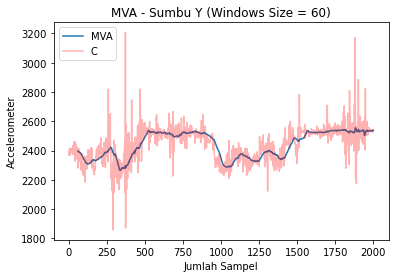

In [6]:
plot1 = plt.figure(1)
mva_filter(C_2000,20).plot(label ='MVA')
plt.plot(C_2000, label='C', alpha = 0.3, c='red')
plt.title('MVA - Sumbu Y (Windows Size = 20)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')


plot2 = plt.figure(2)
mva_filter(C_2000,40).plot(label ='MVA')
plt.plot(C_2000, label='C', alpha = 0.3, c='red')
plt.title('MVA - Sumbu Y (Windows Size = 40)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

plot3 = plt.figure(3)
mva_filter(C_2000,60).plot(label ='MVA')
plt.plot(C_2000, label='C', alpha = 0.3, c='red')
plt.title('MVA - Sumbu Y (Windows Size = 60)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

#### Kolom D (sumbu Z dari accelerometer)

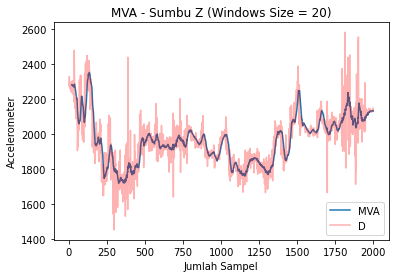

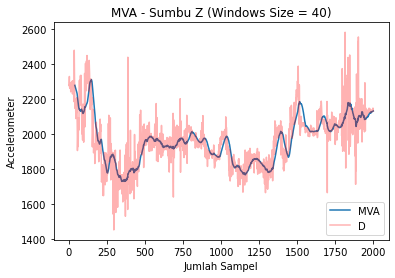

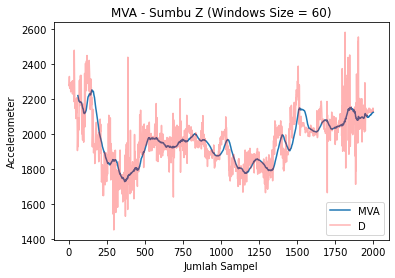

In [7]:
plot1 = plt.figure(1)
mva_filter(D_2000,20).plot(label ='MVA')
plt.plot(D_2000, label='D', alpha = 0.3, c='red')
plt.title('MVA - Sumbu Z (Windows Size = 20)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

plot2 = plt.figure(2)
mva_filter(D_2000,40).plot(label ='MVA')
plt.plot(D_2000, label='D', alpha = 0.3, c='red')
plt.title('MVA - Sumbu Z (Windows Size = 40)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

plot3 = plt.figure(3)
mva_filter(D_2000,60).plot(label ='MVA')
plt.plot(D_2000, label='D', alpha = 0.3, c='red')
plt.title('MVA - Sumbu Z (Windows Size = 60)')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

## LPF FILTER

In [8]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Filter requirements.
order  = 6
fs     = 44    # sample rate, per data
cutoff = 3.01  # cutoff frequency yang diinginkan dari filter

#### Kolom B (sumbu X dari accelerometer)

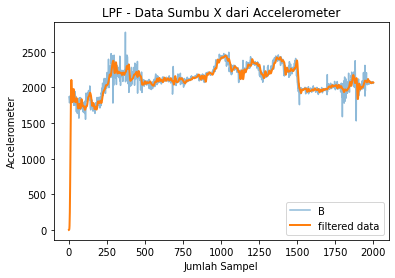

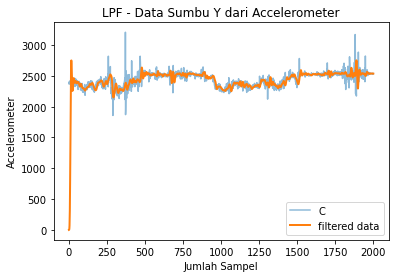

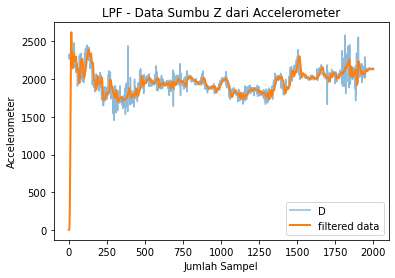

In [9]:
# Kolom B (Sumbu X Accelerometer)
plot1 = plt.figure(1)
y = butter_lowpass_filter(B_2000, cutoff, fs, order)
plt.plot(B_2000, label='B', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.title('LPF - Data Sumbu X dari Accelerometer')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

# Kolom C (Sumbu Y Accelerometer)
plot2 = plt.figure(2)
y = butter_lowpass_filter(C_2000, cutoff, fs, order)
plt.plot(C_2000, label='C', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.title('LPF - Data Sumbu Y dari Accelerometer')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')

# Kolom D (Sumbu Z Accelerometer)
plot3 = plt.figure(3)
y = butter_lowpass_filter(D_2000, cutoff, fs, order)
plt.plot(D_2000, label='D', alpha = 0.5)
plt.plot(y, linewidth=2, label='filtered data')
plt.title('LPF - Data Sumbu Z dari Accelerometer')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Accelerometer')
plt.legend(loc='best')